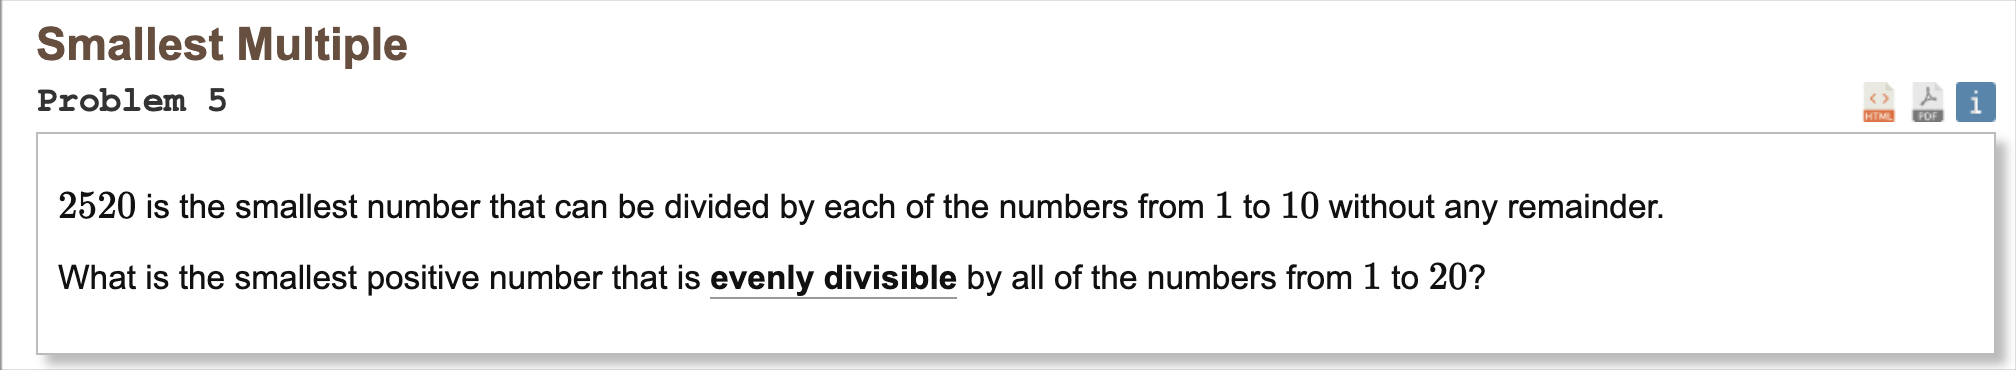

## Thinking process

How to reach 2520 with numbers from 1 to 10?

10, 9 , 8 , 7 , 6 , 5 , 4, 3, 2  
10: 2,5  
9: 3,3  
8: 2,2,2  
7: ..  
6: 2,3  
5: ..  
4: 2,2  
3: ..  
2: ..  

In [1]:
10*9*7*4

2520

Lets list all primes in a range:

In [2]:
def is_prime(n):
    for i in range(2,n):
        if n%i==0:
            return False
    return True

nums = list(range(1,11))
prime_list = list()
for i in nums:
    if is_prime(i):
        prime_list.append(i)

prime_list

[1, 2, 3, 5, 7]

Convert all primes and their counts into dict.  
Start with creating a dict with all primes:

In [3]:
final_dict = dict()

for i in prime_list:
    final_dict[i]=0

final_dict

{1: 0, 2: 0, 3: 0, 5: 0, 7: 0}

Function to list all prime factors:

In [4]:
def prime_factors(n):
    factors = list()
    for i in range(2,n+1):
        if is_prime(i):
            while n%i==0:
                factors.append(i)
                n=n/i
    return factors

prime_factors(10)

[2, 5]

In [5]:
final_dict

{1: 0, 2: 0, 3: 0, 5: 0, 7: 0}

Fill the dict with prime numbers and counts

In [6]:
for i in range(10,2,-1):
    for k in prime_factors(i):
        if final_dict[k]<prime_factors(i).count(k):
            final_dict[k]=prime_factors(i).count(k)

final_dict

{1: 0, 2: 3, 3: 2, 5: 1, 7: 1}

Product all prime numbers:

In [7]:
product = 1
for i in final_dict:
    product*=i**final_dict[i]
product

2520

Good! Moving forward with the problem.

## Initial approach

In [8]:
%%time

def is_prime(n):
    for i in range(2,n):
        if n%i==0:
            return False
    return True

def prime_factors(n):
    factors = list()
    for i in range(2,n+1):
        if is_prime(i):
            while n%i==0:
                factors.append(i)
                n=n/i
    return factors

def v3_solution(n):
    prime_list = list()
    nums = list(range(2,n+1))
    for i in nums:
        if is_prime(i):
            prime_list.append(i)
    final_dict = dict()
    product = 1
    for i in prime_list:
        final_dict[i]=0
    for i in range(n,2,-1):
        for k in prime_factors(i):
            if final_dict[k]<prime_factors(i).count(k):
                final_dict[k]=prime_factors(i).count(k)
    for i in final_dict:
        product*=i**final_dict[i]
    return product, final_dict

v3_solution(20)

CPU times: user 195 μs, sys: 0 ns, total: 195 μs
Wall time: 197 μs


(232792560, {2: 4, 3: 2, 5: 1, 7: 1, 11: 1, 13: 1, 17: 1, 19: 1})

## Clean and tested code

In [9]:
%%time

import math
from collections import Counter

def is_prime(n):
    if n < 2:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False
    for i in range(3, int(math.sqrt(n)) + 1, 2):
        if n % i == 0:
            return False
    return True

def prime_factors(n):
    i = 2
    factors = []
    while i * i <= n:
        while n % i == 0:
            factors.append(i)
            n //= i
        i += 1 if i == 2 else 2
    if n > 1:
        factors.append(n)
    return factors

def v3_solution(n):
    final_dict = {}
    for i in range(2, n + 1):
        factor_counts = Counter(prime_factors(i))
        for factor, count in factor_counts.items():
            if factor not in final_dict or count > final_dict[factor]:
                final_dict[factor] = count
    product = math.prod([k**v for k, v in final_dict.items()])
    return product, final_dict

v3_solution(20)

CPU times: user 52 μs, sys: 3 μs, total: 55 μs
Wall time: 57 μs


(232792560, {2: 4, 3: 2, 5: 1, 7: 1, 11: 1, 13: 1, 17: 1, 19: 1})